In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [3]:
# Read data using pandas
data=pd.read_csv("C:/Users/kumar/OneDrive/Desktop/Data Science/Project Files/sonar.csv", names=[ 'Input1','Input2','Input3','Input4','Input5','Input6','Input7','Input8','Input9','Input10','Input11','Input12','Input13','Input14','Input15','Input16','Input17','Input18','Input19','Input20','Input21','Input22','Input23','Input24','Input25','Input26','Input27','Input28','Input29','Input30','Input31','Input32','Input33','Input34','Input35','Input36','Input37','Input38','Input39','Input40','Input41','Input42','Input43','Input44','Input45','Input46','Input47','Input48','Input49','Input50','Input51','Input52','Input53','Input54','Input55','Input56','Input57','Input58','Input59','Input60','Class'])

In [4]:
data.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,...,Input52,Input53,Input54,Input55,Input56,Input57,Input58,Input59,Input60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
data.shape

(208, 61)

In [6]:
data.describe()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,...,Input51,Input52,Input53,Input54,Input55,Input56,Input57,Input58,Input59,Input60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
# class distribution of target 
print(data.groupby('Class').size())

Class
M    111
R     97
dtype: int64


In [8]:
# Data Visualization - Univariate Plots

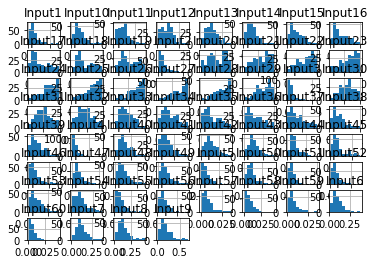

In [9]:
# plotting histogram to get more clear idea about data distribution
data.hist()
plt.show()

In [10]:
# Data Visualization - Multivariate Plots

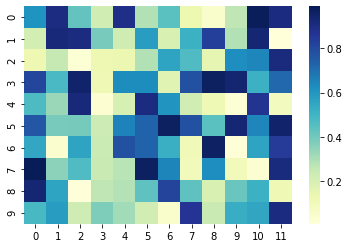

In [11]:
import numpy as np
import seaborn as sns
data = np.random.rand(10, 12)
ax = sns.heatmap(data, cmap="YlGnBu")

# Perform EDA process

# Prepare x & y using pandas & check its shape

In [12]:
import pandas as pd

data=pd.read_csv("C:/Users/kumar/OneDrive/Desktop/Data Science/Project Files/sonar.csv", names=[ 'Input1','Input2','Input3','Input4','Input5','Input6','Input7','Input8','Input9','Input10','Input11','Input12','Input13','Input14','Input15','Input16','Input17','Input18','Input19','Input20','Input21','Input22','Input23','Input24','Input25','Input26','Input27','Input28','Input29','Input30','Input31','Input32','Input33','Input34','Input35','Input36','Input37','Input38','Input39','Input40','Input41','Input42','Input43','Input44','Input45','Input46','Input47','Input48','Input49','Input50','Input51','Input52','Input53','Input54','Input55','Input56','Input57','Input58','Input59','Input60','Class'])

feature_cols = ['Input1','Input2','Input3','Input4','Input5','Input6','Input7','Input8','Input9','Input10','Input11','Input12','Input13','Input14','Input15','Input16','Input17','Input18','Input19','Input20','Input21','Input22','Input23','Input24','Input25','Input26','Input27','Input28','Input29','Input30','Input31','Input32','Input33','Input34','Input35','Input36','Input37','Input38','Input39','Input40','Input41','Input42','Input43','Input44','Input45','Input46','Input47','Input48','Input49','Input50','Input51','Input52','Input53','Input54','Input55','Input56','Input57','Input58','Input59','Input60']

X = data[feature_cols]
y = data.Class        # y is a vector, hence we use dot to access 'label'

In [13]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(208, 60)


In [14]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(208,)


In [15]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.8076923076923077


classification accuracy is 80 % (percentage of correct prediction)
Now check for Null accuracy: accuracy that could be achieved by always predicting the most frequent class
We must always compare with this

In [18]:
# check class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

M    27
R    25
Name: Class, dtype: int64

AUC- percentage of the ROC plot that is under the curve

In [19]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
# print(metrics.roc_auc_score(y_test, y_pred_prob))

In [20]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.736986531986532

AUC shows higher predicted probability means positive outcome.

# Apply Classification Models- SVM,SVC,KNN,Descision Tree

In [21]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [22]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]
# scoring =[r2,neg_mean_squared_error,explained_variance]

sv=SVC()
score=cross_val_score(sv,X,y,cv=20,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=20)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.45454545 0.54545455 0.90909091 0.90909091 0.81818182 0.72727273
 0.81818182 1.         0.8        0.1        0.6        0.7
 0.6        0.9        1.         0.5        0.5        1.
 0.9        0.7       ]
mean scores <built-in method mean of numpy.ndarray object at 0x0000014269FD0620>
std 0.2245707567636277
Y prediction values
['R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R'
 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M'
 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' '

0.7259615384615384

In [23]:
# Decision Tree Classifier (criterion='gini')
# Decision Tree Classifier (criterion='entropy')
# gini and entropy

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=30,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=30)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

f1_score: [0.22222222 0.22222222 0.3        0.57142857 0.57142857 0.41666667
 0.84444444 0.53333333 0.65       0.125      1.         0.85714286
 0.36363636 0.53333333 0.70833333 0.3        0.70833333 1.
 0.53333333 0.85714286 0.53333333 0.53333333 0.57142857 0.84444444
 0.36363636 0.65       0.84444444 0.84444444 0.625      0.82857143]
mean score: 0.5985545935545936
stn deviation: 0.23335321129898876
Y prediction values
['M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R'
 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'R'
 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'R'
 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M'
 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M'
 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M'
 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 

array([[67, 44],
       [36, 61]], dtype=int64)

In [24]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=30,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=30)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

accuracy score: [0.28571429 0.57142857 0.71428571 0.85714286 0.71428571 0.85714286
 0.85714286 0.85714286 0.71428571 0.71428571 1.         1.
 0.85714286 0.71428571 0.57142857 0.57142857 1.         0.57142857
 0.42857143 0.57142857 0.85714286 0.85714286 1.         0.85714286
 0.85714286 0.57142857 0.71428571 1.         0.5        0.66666667]
mean score: 0.7436507936507937
stn deviation: 0.18274832796264331
Y prediction values
['M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M'
 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M'
 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R'
 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M

array([[90, 21],
       [32, 65]], dtype=int64)

In [25]:
svrbf=SVC(kernel='rbf') 
score=cross_val_score(svrbf,X,y,cv=20)
print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())
y_pred = cross_val_predict(svrbf, X, y, cv=20)
print('Y prediction values')
print(y_pred)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

accuracy score: [0.45454545 0.54545455 0.90909091 0.90909091 0.81818182 0.72727273
 0.81818182 1.         0.8        0.1        0.6        0.7
 0.6        0.9        1.         0.5        0.5        1.
 0.9        0.7       ]
mean score: 0.7240909090909091
stn deviation: 0.2245707567636277
Y prediction values
['R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R'
 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M'
 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M'
 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'R'

In [27]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file

score=cross_val_score(knn,X,y,cv=30,scoring='accuracy')

print(score)

[0.28571429 0.57142857 0.71428571 0.85714286 0.71428571 0.85714286
 0.85714286 0.85714286 0.71428571 0.71428571 1.         1.
 0.85714286 0.71428571 0.57142857 0.57142857 1.         0.57142857
 0.42857143 0.57142857 0.85714286 0.85714286 1.         0.85714286
 0.85714286 0.57142857 0.71428571 1.         0.5        0.66666667]


Conclusion - 
knn model for cross validation with k-fold=30 gives below stats
accuracy score : 1 (higest)
mean score : 0.7436507936507937
standard deviation : 0.18274832796264331